In [494]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns 

In [495]:
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv" )

In [496]:
print("Train shape: ",train_df.shape)
print("Test shape: ",test_df.shape)

Train shape:  (50882, 14)
Test shape:  (21805, 13)


In [497]:
train_df.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [498]:
test_df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [499]:
print("\nData types:\n",train_df.dtypes)



Data types:
 ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object


In [500]:
print("\nData types test:\n",test_df.dtypes)


Data types test:
 ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
dtype: object


In [501]:
train_df.select_dtypes(include='object').nunique()

City_Code                  36
Accomodation_Type           2
Reco_Insurance_Type         2
Is_Spouse                   2
Health Indicator            9
Holding_Policy_Duration    15
dtype: int64

In [502]:
#dropping ID columns
train_df.drop(columns=['ID'],inplace=True)
test_df.drop(columns=['ID'],inplace=True)
print('\nColumns after dropping:\n',train_df.columns.tolist())
print("\nColumns after dropping ID in test:\n",test_df.columns.tolist())


Columns after dropping:
 ['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']

Columns after dropping ID in test:
 ['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium']


In [503]:
print("\nTrain missing:\n",train_df.isnull().sum())


Train missing:
 City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64


In [504]:
#separating numerical and categorical columns
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("\nNumeric columns:",num_cols)
print("\nCategorical columns:",cat_cols)


Numeric columns: ['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response']

Categorical columns: ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration']


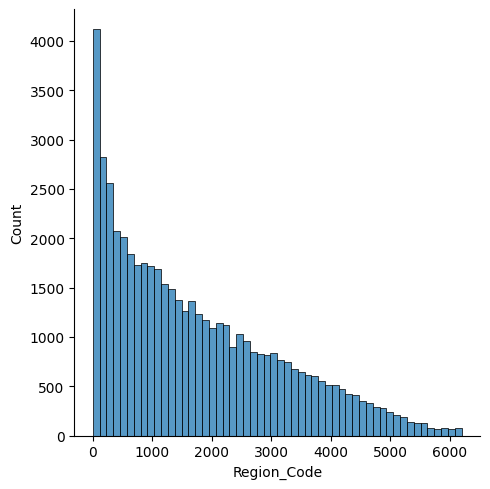

In [505]:
sns.displot(train_df['Region_Code'])
#distribution plot for region code

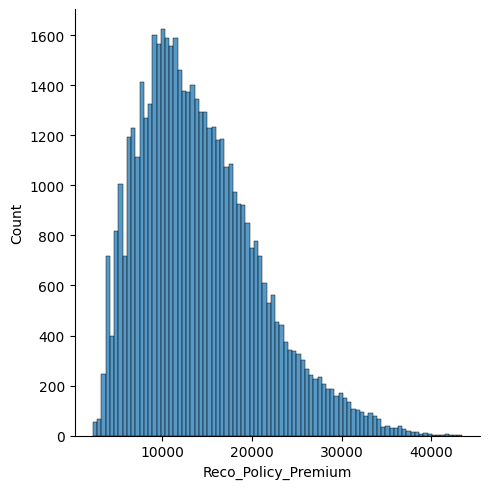

In [506]:
sns.displot(train_df['Reco_Policy_Premium'])
#dist plot for recommended policy premium
# from this we can see that preimum of amount about 10000 is mostly recommended

In [507]:
train_df['Reco_Policy_Premium'].describe()
#describes premium for policy

count    50882.000000
mean     14183.950069
std       6590.074873
min       2280.000000
25%       9248.000000
50%      13178.000000
75%      18096.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

In [508]:
train_df['City_Code'].unique()

array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [509]:
train_df['City_Code'] = train_df['City_Code'].map({'C3':3, 'C5':5, 'C24':24, 'C8':8, 'C9':9, 'C1':1, 'C15':15, 'C28':28, 'C27':27, 'C7':7,
       'C20':20, 'C25':25, 'C4':4, 'C2':2, 'C34':34, 'C10':10, 'C17':17, 'C18':18, 'C16':16, 'C29':29,
       'C33':33, 'C26':26, 'C19':19, 'C6':6, 'C12':12, 'C13':13, 'C11':11, 'C14':14, 'C22':22,
       'C23':23, 'C21':21, 'C36':36, 'C32':32, 'C30':30, 'C35':35, 'C31':31})
train_df.sample(n=5)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
5233,2,3530,Rented,Individual,46,46,No,NaN,1.0,3.0,14,12402.0,0
40907,1,3612,Owned,Individual,33,33,No,X4,NaN,NaN,20,11556.0,1
22921,9,1912,Owned,Individual,68,68,No,X5,2.0,1.0,6,15768.0,0
34408,4,943,Rented,Individual,22,22,No,X5,NaN,NaN,14,6948.0,0
7399,22,254,Owned,Individual,75,75,No,X2,NaN,NaN,17,20502.0,1


In [510]:
train_df['Holding_Policy_Duration'].unique()

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [511]:
#replacing '14+',handling nullvalues and changing str to float
train_df['Holding_Policy_Duration'] = train_df['Holding_Policy_Duration'].replace('14+',15.0)
train_df['Holding_Policy_Duration'].replace(np.nan,train_df['Holding_Policy_Duration'].mode()[0],inplace=True)
train_df['Holding_Policy_Duration'].astype(float)


C:\Users\abhij\AppData\Local\Temp\ipykernel_18692\467287381.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Holding_Policy_Duration'].replace(np.nan,train_df['Holding_Policy_Duration'].mode()[0],inplace=True)


0        15.0
1         1.0
2         1.0
3        15.0
4         3.0
         ... 
50877     1.0
50878     7.0
50879    15.0
50880     2.0
50881     2.0
Name: Holding_Policy_Duration, Length: 50882, dtype: float64

In [512]:
train_df['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [513]:
train_df['Health Indicator'].replace(np.nan,train_df['Health Indicator'].mode()[0],inplace=True)

train_df['Health Indicator'].value_counts()

C:\Users\abhij\AppData\Local\Temp\ipykernel_18692\660997289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Health Indicator'].replace(np.nan,train_df['Health Indicator'].mode()[0],inplace=True)


Health Indicator
X1    24701
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: count, dtype: int64

In [514]:
train_df['Health Indicator'] = train_df['Health Indicator'].map({'X1':1, 'X2':2, 'X4':4, 'X3':3, 'X6':6, 'X5':5, 'X8':8, 'X7':7, 'X9':9})
train_df['Health Indicator'].value_counts()

Health Indicator
1    24701
2    10332
3     6762
4     5743
5     1727
6     1280
7      196
8       78
9       63
Name: count, dtype: int64

0        3.0
1        NaN
2        1.0
3        3.0
4        1.0
        ... 
50877    NaN
50878    3.0
50879    1.0
50880    2.0
50881    3.0
Name: Holding_Policy_Type, Length: 50882, dtype: float64


In [516]:
train_df.isnull().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator               0
Holding_Policy_Duration        0
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [517]:
train_df['Holding_Policy_Type'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [518]:
train_df['Holding_Policy_Type'].replace(np.nan,train_df['Holding_Policy_Type'].mode()[0],inplace=True)
train_df['Holding_Policy_Type'].value_counts()

C:\Users\abhij\AppData\Local\Temp\ipykernel_18692\622247664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Holding_Policy_Type'].replace(np.nan,train_df['Holding_Policy_Type'].mode()[0],inplace=True)


Holding_Policy_Type
3.0    33530
1.0     8173
2.0     5005
4.0     4174
Name: count, dtype: int64

In [519]:
train_df.isnull().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

OBSERVATTIONS
Here mostly premium ,Age groups,Health ,Accomdation type can influence the coverting of policies 